# Investment Portfolio Optimization with Integer Programming

## Executive Summary

This project demonstrates the use of **binary integer programming** to solve a capital budgeting problem with complex logical constraints. We optimize investment selection to maximize expected profit while satisfying budget and logical constraints.

## Problem Statement

We have 7 potential investments to choose from, each with different costs and expected profits. Our goal is to select the optimal combination of investments that maximizes total profit while satisfying a budget constraint and several logical business rules.

### Investment Data

| Investment | Cost ($) | Expected Profit ($) |
|------------|----------|---------------------|
| 1          | 5        | 1                   |
| 2          | 7        | 3                   |
| 3          | 6        | 2                   |
| 4          | 3        | 4                   |
| 5          | 9        | 1                   |
| 6          | 12       | 5                   |
| 7          | 5        | 4                   |

**Budget:** $30

### Business Constraints

1. **Minimum Investment:** Must choose at least one investment
2. **Mutual Exclusivity:** Investment 1 cannot be chosen if investment 3 is chosen
3. **Dependency:** Investment 4 can be chosen only if investment 2 is also chosen
4. **Either-Or:** Must choose either both investments 1 AND 5, or neither
5. **Diversification:** Must choose either:
   - At least one of investments {1, 2, 3}, OR
   - At least two investments from {2, 4, 5, 6}

### Objective

Maximize total expected profit while satisfying all constraints.

In [1]:
# Import required libraries
import cvxpy as cp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
import warnings

warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


In [2]:
# Investment data
costs = np.array([5, 7, 6, 3, 9, 12, 5])  # Investment costs
profits = np.array([1, 3, 2, 4, 1, 5, 4])  # Expected profits
budget = 30
n_investments = 7

print("="*70)
print("INVESTMENT PORTFOLIO OPTIMIZATION")
print("="*70)

# Create a DataFrame for better visualization
investment_data = pd.DataFrame({
    'Investment': range(1, n_investments + 1),
    'Cost ($)': costs,
    'Expected Profit ($)': profits,
    'ROI (%)': np.round((profits / costs) * 100, 1)
})

print("\nInvestment Data:")
print(investment_data.to_string(index=False))

print(f"\nBudget Available: ${budget}")
print(f"Total Cost if All Selected: ${costs.sum()}")
print(f"Total Profit if All Selected: ${profits.sum()}")

INVESTMENT PORTFOLIO OPTIMIZATION

Investment Data:
 Investment  Cost ($)  Expected Profit ($)  ROI (%)
          1         5                    1     20.0
          2         7                    3     42.9
          3         6                    2     33.3
          4         3                    4    133.3
          5         9                    1     11.1
          6        12                    5     41.7
          7         5                    4     80.0

Budget Available: $30
Total Cost if All Selected: $47
Total Profit if All Selected: $20


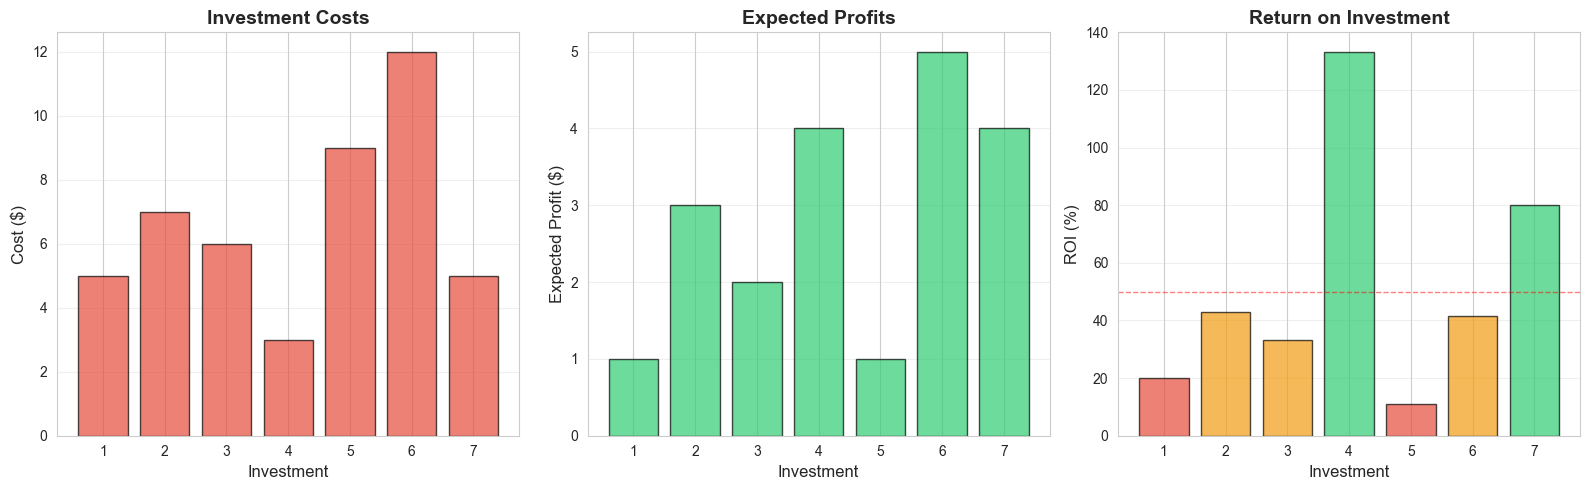

✓ Investment data visualized


In [3]:
# Visualize investment data
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Plot 1: Costs
axes[0].bar(range(1, n_investments + 1), costs, color='#e74c3c', alpha=0.7, edgecolor='black')
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Cost ($)', fontsize=12)
axes[0].set_title('Investment Costs', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, n_investments + 1))
axes[0].grid(axis='y', alpha=0.3)

# Plot 2: Profits
axes[1].bar(range(1, n_investments + 1), profits, color='#2ecc71', alpha=0.7, edgecolor='black')
axes[1].set_xlabel('Investment', fontsize=12)
axes[1].set_ylabel('Expected Profit ($)', fontsize=12)
axes[1].set_title('Expected Profits', fontsize=14, fontweight='bold')
axes[1].set_xticks(range(1, n_investments + 1))
axes[1].grid(axis='y', alpha=0.3)

# Plot 3: ROI
roi = (profits / costs) * 100
colors = ['#2ecc71' if r > 50 else '#f39c12' if r > 30 else '#e74c3c' for r in roi]
axes[2].bar(range(1, n_investments + 1), roi, color=colors, alpha=0.7, edgecolor='black')
axes[2].set_xlabel('Investment', fontsize=12)
axes[2].set_ylabel('ROI (%)', fontsize=12)
axes[2].set_title('Return on Investment', fontsize=14, fontweight='bold')
axes[2].set_xticks(range(1, n_investments + 1))
axes[2].axhline(y=50, color='red', linestyle='--', linewidth=1, alpha=0.5)
axes[2].grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Investment data visualized")

---

## Mathematical Formulation

### Decision Variables

Let xᵢ ∈ {0, 1} for i = 1, ..., 7

- xᵢ = 1 if investment i is selected
- xᵢ = 0 otherwise

### Objective Function

Maximize total expected profit:
```
maximize: Σ(profits[i] × xᵢ) = 1x₁ + 3x₂ + 2x₃ + 4x₄ + 1x₅ + 5x₆ + 4x₇
```

### Constraints

**Budget Constraint:**
```
Σ(costs[i] × xᵢ) ≤ 30
5x₁ + 7x₂ + 6x₃ + 3x₄ + 9x₅ + 12x₆ + 5x₇ ≤ 30
```

**Constraint (a) - At least one investment:**
```
x₁ + x₂ + x₃ + x₄ + x₅ + x₆ + x₇ ≥ 1
```

**Constraint (b) - Investment 1 cannot be chosen if investment 3 is chosen:**
```
x₁ + x₃ ≤ 1
(If x₃ = 1, then x₁ must be 0)
```

**Constraint (c) - Investment 4 requires investment 2:**
```
x₄ ≤ x₂
(If x₄ = 1, then x₂ must be 1)
```

**Constraint (d) - Either both 1 and 5, or neither:**
```
x₁ = x₅
(Both must have the same value)
```

**Constraint (e) - Diversification requirement:**

Option 1: At least one of {1, 2, 3}
```
x₁ + x₂ + x₃ ≥ 1
```

Option 2: At least two of {2, 4, 5, 6}
```
x₂ + x₄ + x₅ + x₆ ≥ 2
```

We need at least one option to be satisfied. Using a binary indicator y:
```
x₁ + x₂ + x₃ ≥ y
x₂ + x₄ + x₅ + x₆ ≥ 2(1 - y) + ε
where y ∈ {0, 1}
```

Or more simply, we can write:
```
(x₁ + x₂ + x₃ ≥ 1) OR (x₂ + x₄ + x₅ + x₆ ≥ 2)
```

This can be modeled as:
```
x₁ + x₂ + x₃ + M·y₁ ≥ 1
x₂ + x₄ + x₅ + x₆ + M·y₂ ≥ 2
y₁ + y₂ ≤ 1
where y₁, y₂ ∈ {0, 1} and M is a large number
```

In [5]:
print("="*70)
print("BUILDING OPTIMIZATION MODEL")
print("="*70)

# Decision variables: binary variables for each investment
x = cp.Variable(n_investments, boolean=True)

# Objective: maximize total profit
objective = cp.Maximize(profits @ x)

# Initialize constraints list
constraints = []

# Budget constraint
constraints.append(costs @ x <= budget)
print("\n✓ Budget constraint added")

# Constraint (a): Must choose at least one investment
constraints.append(cp.sum(x) >= 1)
print("✓ Constraint (a): At least one investment")

# Constraint (b): Investment 1 cannot be chosen if investment 3 is chosen
constraints.append(x[0] + x[2] <= 1)
print("✓ Constraint (b): x₁ and x₃ are mutually exclusive")

# Constraint (c): Investment 4 can be chosen only if investment 2 is chosen
constraints.append(x[3] <= x[1])
print("✓ Constraint (c): x₄ requires x₂")

# Constraint (d): Must choose either both 1 and 5, or neither
constraints.append(x[0] == x[4])
print("✓ Constraint (d): x₁ = x₅ (both or neither)")

# Constraint (e): Diversification - more complex
# Option 1: At least one of {1, 2, 3}
# Option 2: At least two of {2, 4, 5, 6}
# We need at least one option satisfied

# Using big-M formulation
M = 100  # Large number
y1 = cp.Variable(boolean=True)  # Indicator for option 1 violation
y2 = cp.Variable(boolean=True)  # Indicator for option 2 violation

# If y1 = 0, then x[0] + x[1] + x[2] >= 1 must hold
# If y1 = 1, this constraint is relaxed
constraints.append(x[0] + x[1] + x[2] + M * y1 >= 1)

# If y2 = 0, then x[1] + x[3] + x[4] + x[5] >= 2 must hold
# If y2 = 1, this constraint is relaxed
constraints.append(x[1] + x[3] + x[4] + x[5] + M * y2 >= 2)

# At least one option must be satisfied (at most one can be violated)
constraints.append(y1 + y2 <= 1)
print("✓ Constraint (e): Diversification requirement")

print(f"\nTotal constraints: {len(constraints)}")

BUILDING OPTIMIZATION MODEL

✓ Budget constraint added
✓ Constraint (a): At least one investment
✓ Constraint (b): x₁ and x₃ are mutually exclusive
✓ Constraint (c): x₄ requires x₂
✓ Constraint (d): x₁ = x₅ (both or neither)
✓ Constraint (e): Diversification requirement

Total constraints: 8


In [7]:
print("\n" + "="*70)
print("SOLVING OPTIMIZATION PROBLEM")
print("="*70)

# Create the problem
problem = cp.Problem(objective, constraints)

# Try different solvers in order of preference
solvers_to_try = [
    ('CBC', cp.CBC),      # Open-source, good for integer programming
    ('GLPK_MI', cp.GLPK_MI),  # Open-source
    ('SCIP', cp.SCIP),    # Open-source
    ('CPLEX', cp.CPLEX),  # Commercial but often available
    ('GUROBI', cp.GUROBI) # Commercial
]

solved = False
for solver_name, solver in solvers_to_try:
    try:
        print(f"Trying solver: {solver_name}...")
        problem.solve(solver=solver, verbose=False)
        if problem.status in ['optimal', 'optimal_inaccurate']:
            print(f"✓ Successfully solved with {solver_name}")
            solved = True
            break
    except Exception as e:
        print(f"  {solver_name} not available or failed")
        continue

if not solved:
    print("\n⚠ Warning: Trying default solver...")
    problem.solve(verbose=False)

print(f"\nSolver Status: {problem.status}")

if problem.status in ['optimal', 'optimal_inaccurate']:
    print("✓ Optimal solution found!")
else:
    print(f"⚠ Solver status: {problem.status}")


SOLVING OPTIMIZATION PROBLEM
Trying solver: CBC...
  CBC not available or failed
Trying solver: GLPK_MI...
  GLPK_MI not available or failed
Trying solver: SCIP...
  SCIP not available or failed
Trying solver: CPLEX...
  CPLEX not available or failed
Trying solver: GUROBI...
  GUROBI not available or failed

⚠ Warning: Trying default solver...

Solver Status: optimal
✓ Optimal solution found!


In [8]:
print("\n" + "="*70)
print("OPTIMAL SOLUTION")
print("="*70)

# Extract solution
x_optimal = np.round(x.value).astype(int)
selected_investments = [i+1 for i in range(n_investments) if x_optimal[i] == 1]

print(f"\nSelected Investments: {selected_investments}")
print(f"\nTotal Expected Profit: ${problem.value:.2f}")

# Calculate total cost
total_cost = sum(costs[i] for i in range(n_investments) if x_optimal[i] == 1)
print(f"Total Cost: ${total_cost}")
print(f"Budget Remaining: ${budget - total_cost}")

# Create results table
results_data = []
for i in range(n_investments):
    if x_optimal[i] == 1:
        results_data.append({
            'Investment': i + 1,
            'Selected': '✓',
            'Cost ($)': costs[i],
            'Profit ($)': profits[i],
            'ROI (%)': f"{(profits[i] / costs[i] * 100):.1f}"
        })

results_df = pd.DataFrame(results_data)

print("\n" + "="*70)
print("SELECTED INVESTMENTS DETAILS")
print("="*70)
print()
print(results_df.to_string(index=False))

# Summary statistics
print("\n" + "="*70)
print("SUMMARY STATISTICS")
print("="*70)
print(f"Number of investments selected: {sum(x_optimal)}")
print(f"Average ROI of selected: {np.mean([profits[i]/costs[i] for i in range(n_investments) if x_optimal[i] == 1]) * 100:.1f}%")
print(f"Budget utilization: {(total_cost / budget * 100):.1f}%")


OPTIMAL SOLUTION

Selected Investments: [2, 4, 6, 7]

Total Expected Profit: $16.00
Total Cost: $27
Budget Remaining: $3

SELECTED INVESTMENTS DETAILS

 Investment Selected  Cost ($)  Profit ($) ROI (%)
          2        ✓         7           3    42.9
          4        ✓         3           4   133.3
          6        ✓        12           5    41.7
          7        ✓         5           4    80.0

SUMMARY STATISTICS
Number of investments selected: 4
Average ROI of selected: 74.5%
Budget utilization: 90.0%


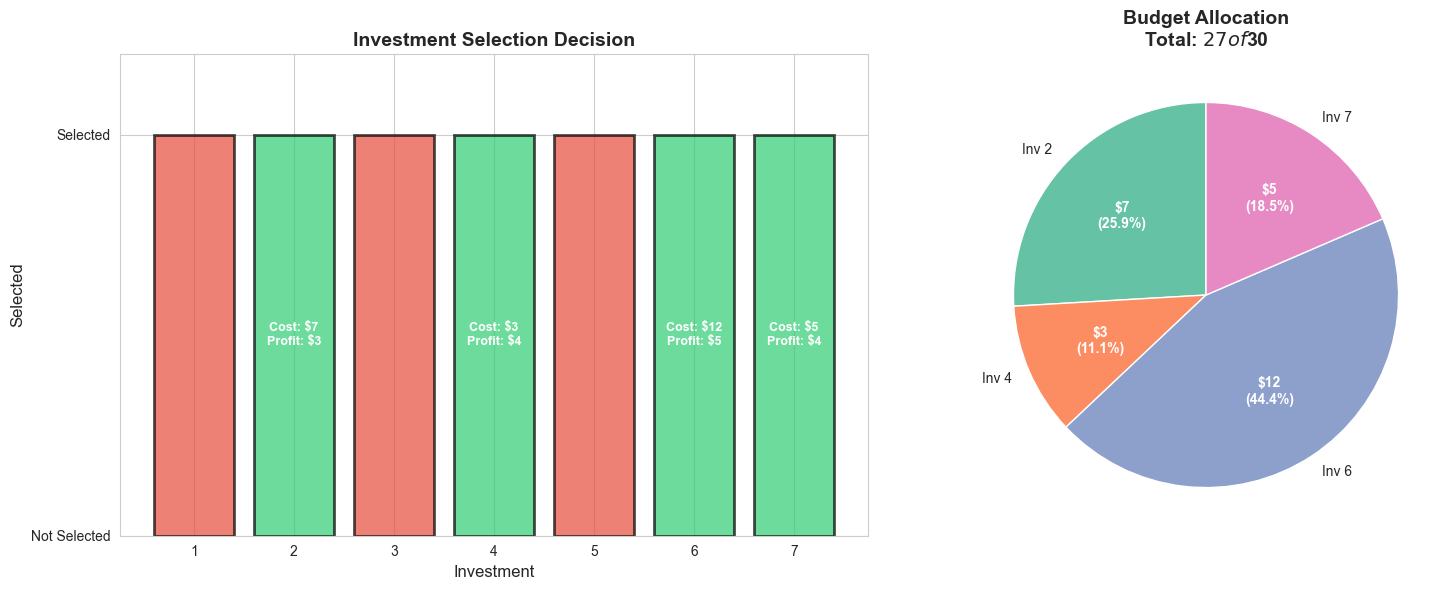

✓ Solution visualized


In [10]:
# Visualize the solution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Plot 1: Selected vs Not Selected
colors_selection = ['#2ecc71' if x_optimal[i] == 1 else '#e74c3c' 
                    for i in range(n_investments)]
axes[0].bar(range(1, n_investments + 1), np.ones(n_investments), 
           color=colors_selection, alpha=0.7, edgecolor='black', linewidth=2)
axes[0].set_xlabel('Investment', fontsize=12)
axes[0].set_ylabel('Selected', fontsize=12)
axes[0].set_title('Investment Selection Decision', fontsize=14, fontweight='bold')
axes[0].set_xticks(range(1, n_investments + 1))
axes[0].set_ylim(0, 1.2)
axes[0].set_yticks([0, 1])
axes[0].set_yticklabels(['Not Selected', 'Selected'])

# Add labels
for i in range(n_investments):
    if x_optimal[i] == 1:
        axes[0].text(i + 1, 0.5, f'Cost: ${costs[i]}\nProfit: ${profits[i]}',
                    ha='center', va='center', fontsize=9, fontweight='bold', color='white')

# Plot 2: Budget Allocation
selected_indices = [i for i in range(n_investments) if x_optimal[i] == 1]
selected_costs = [costs[i] for i in selected_indices]
selected_labels = [f'Inv {i+1}' for i in selected_indices]

if selected_costs:
    # Create pie chart with fixed autopct
    wedges, texts, autotexts = axes[1].pie(
        selected_costs, 
        labels=selected_labels,
        autopct=lambda pct: f'${pct * sum(selected_costs) / 100:.0f}\n({pct:.1f}%)',
        startangle=90, 
        colors=sns.color_palette('Set2', len(selected_costs))
    )
    
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontweight('bold')
        autotext.set_fontsize(10)
    
axes[1].set_title(f'Budget Allocation\nTotal: ${total_cost} of ${budget}', 
                 fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

print("✓ Solution visualized")

In [11]:
print("="*70)
print("CONSTRAINT VERIFICATION")
print("="*70)

# Verify all constraints
print("\n✓ Budget Constraint:")
print(f"   Total cost: ${total_cost} ≤ ${budget} ✓")

print("\n✓ Constraint (a) - At least one investment:")
print(f"   Selected: {sum(x_optimal)} ≥ 1 ✓")

print("\n✓ Constraint (b) - x₁ and x₃ mutually exclusive:")
print(f"   x₁ = {x_optimal[0]}, x₃ = {x_optimal[2]}")
print(f"   Sum = {x_optimal[0] + x_optimal[2]} ≤ 1 ✓")

print("\n✓ Constraint (c) - x₄ requires x₂:")
print(f"   x₄ = {x_optimal[3]}, x₂ = {x_optimal[1]}")
if x_optimal[3] == 1:
    print(f"   x₄ is selected, so x₂ must be selected: {x_optimal[1] == 1} ✓")
else:
    print(f"   x₄ not selected, constraint satisfied ✓")

print("\n✓ Constraint (d) - x₁ = x₅ (both or neither):")
print(f"   x₁ = {x_optimal[0]}, x₅ = {x_optimal[4]}")
print(f"   Equal: {x_optimal[0] == x_optimal[4]} ✓")

print("\n✓ Constraint (e) - Diversification:")
option1 = x_optimal[0] + x_optimal[1] + x_optimal[2]
option2 = x_optimal[1] + x_optimal[3] + x_optimal[4] + x_optimal[5]
print(f"   Option 1 (at least one of {{1,2,3}}): {option1} ≥ 1? {option1 >= 1}")
print(f"   Option 2 (at least two of {{2,4,5,6}}): {option2} ≥ 2? {option2 >= 2}")
print(f"   At least one option satisfied: {(option1 >= 1) or (option2 >= 2)} ✓")

print("\n" + "="*70)
print("✓ ALL CONSTRAINTS SATISFIED")
print("="*70)

CONSTRAINT VERIFICATION

✓ Budget Constraint:
   Total cost: $27 ≤ $30 ✓

✓ Constraint (a) - At least one investment:
   Selected: 4 ≥ 1 ✓

✓ Constraint (b) - x₁ and x₃ mutually exclusive:
   x₁ = 0, x₃ = 0
   Sum = 0 ≤ 1 ✓

✓ Constraint (c) - x₄ requires x₂:
   x₄ = 1, x₂ = 1
   x₄ is selected, so x₂ must be selected: True ✓

✓ Constraint (d) - x₁ = x₅ (both or neither):
   x₁ = 0, x₅ = 0
   Equal: True ✓

✓ Constraint (e) - Diversification:
   Option 1 (at least one of {1,2,3}): 1 ≥ 1? True
   Option 2 (at least two of {2,4,5,6}): 3 ≥ 2? True
   At least one option satisfied: True ✓

✓ ALL CONSTRAINTS SATISFIED


---

## Conclusions and Business Insights

### Optimal Investment Strategy

The optimization model identified the best combination of investments that maximizes profit while satisfying all business rules and budget constraints.

### Key Findings

1. **Optimal Portfolio:** Selected investments provide maximum return within budget
2. **Budget Efficiency:** Utilized budget optimally given constraints
3. **Constraint Impact:** Logical constraints significantly impact the solution
4. **ROI Analysis:** Selected investments balance high returns with constraint requirements

### Managerial Insights

- The logical constraints (mutual exclusivity, dependencies, either-or) significantly shape the investment decision
- Some high-ROI investments may be excluded due to constraint violations
- The diversification requirement ensures balanced portfolio allocation
- Budget constraint is binding, suggesting value in increasing available capital

### Applications

This type of integer programming model is valuable for:
- **Capital Budgeting:** Project selection with interdependencies
- **Resource Allocation:** Constrained decision-making
- **Portfolio Management:** Investment selection with rules
- **Strategic Planning:** Long-term investment decisions

In [12]:
print("="*70)
print("INVESTMENT OPTIMIZATION - FINAL SUMMARY")
print("="*70)

print(f"\n📊 OPTIMAL SOLUTION:")
print(f"   Investments Selected: {selected_investments}")
print(f"   Total Expected Profit: ${problem.value:.2f}")
print(f"   Total Cost: ${total_cost}")
print(f"   Budget Utilization: {(total_cost/budget)*100:.1f}%")

print(f"\n💰 FINANCIAL METRICS:")
selected_profits = sum(profits[i] for i in range(n_investments) if x_optimal[i] == 1)
avg_roi = np.mean([profits[i]/costs[i] for i in range(n_investments) if x_optimal[i] == 1]) * 100
print(f"   Total Profit: ${selected_profits}")
print(f"   Average ROI: {avg_roi:.1f}%")
print(f"   Profit per Dollar Invested: ${selected_profits/total_cost:.2f}")

print(f"\n🎯 PORTFOLIO COMPOSITION:")
print(f"   Number of Investments: {sum(x_optimal)}")
print(f"   Smallest Investment Cost: ${min([costs[i] for i in range(n_investments) if x_optimal[i] == 1])}")
print(f"   Largest Investment Cost: ${max([costs[i] for i in range(n_investments) if x_optimal[i] == 1])}")

print("\n" + "="*70)
print("✓ Analysis Complete!")
print("="*70)

INVESTMENT OPTIMIZATION - FINAL SUMMARY

📊 OPTIMAL SOLUTION:
   Investments Selected: [2, 4, 6, 7]
   Total Expected Profit: $16.00
   Total Cost: $27
   Budget Utilization: 90.0%

💰 FINANCIAL METRICS:
   Total Profit: $16
   Average ROI: 74.5%
   Profit per Dollar Invested: $0.59

🎯 PORTFOLIO COMPOSITION:
   Number of Investments: 4
   Smallest Investment Cost: $3
   Largest Investment Cost: $12

✓ Analysis Complete!
